In [1]:
import pandas as pd
import numpy as np

train_df = pd.read_csv("./laptops_train.csv")
test_df = pd.read_csv("./laptops_test.csv")

train_df

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,Dell,Alienware 17,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,32GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows,10,4.42kg,24897600.00
973,Toshiba,Tecra A40-C-1DF,Notebook,"14.0""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows,10,1.95kg,10492560.00
974,Asus,Rog Strix,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows,10,2.73kg,18227710.80
975,HP,Probook 450,Notebook,"15.6""",IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.70GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce 930MX,Windows,10,2.04kg,8705268.00


In [2]:
train_df.columns = train_df.columns.str.lower().str.strip(" ").str.replace(" ", "_")
test_df.columns = test_df.columns.str.lower().str.strip(" ").str.replace(" ", "_")

In [3]:
print(train_df.columns)
print(test_df.columns)

Index(['manufacturer', 'model_name', 'category', 'screen_size', 'screen',
       'cpu', 'ram', 'storage', 'gpu', 'operating_system',
       'operating_system_version', 'weight', 'price'],
      dtype='object')
Index(['manufacturer', 'model_name', 'category', 'screen_size', 'screen',
       'cpu', 'ram', 'storage', 'gpu', 'operating_system',
       'operating_system_version', 'weight', 'price'],
      dtype='object')


In [4]:
train_df.describe(include="all")

,manufacturer,model_name,category,screen_size,screen,cpu,ram,storage,gpu,operating_system,operating_system_version,weight,price
count,977,977,977,977,977,977,977,977,977,977,841,977,9.770000e+02
unique,19,488,6,18,38,106,8,36,98,7,4,166,NaN
top,Dell,XPS 13,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows,10,2.2kg,NaN
freq,232,22,549,494,397,151,483,318,225,837,819,98,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.001899e+07
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.306430e+06
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.706375e+06
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.326308e+06
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.527428e+06
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.311570e+07


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   manufacturer              977 non-null    object 
 1   model_name                977 non-null    object 
 2   category                  977 non-null    object 
 3   screen_size               977 non-null    object 
 4   screen                    977 non-null    object 
 5   cpu                       977 non-null    object 
 6   ram                       977 non-null    object 
 7   storage                   977 non-null    object 
 8   gpu                       977 non-null    object 
 9   operating_system          977 non-null    object 
 10  operating_system_version  841 non-null    object 
 11  weight                    977 non-null    object 
 12  price                     977 non-null    float64
dtypes: float64(1), object(12)
memory usage: 99.4+ KB


<Axes: >

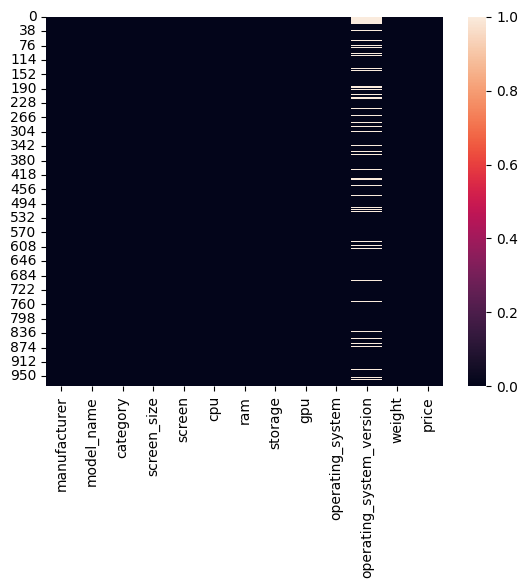

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(train_df.isna())

In [7]:
def showCountPlot(cols):
    sns.catplot(train_df[cols], kind="count", order=train_df[cols].value_counts().index);
    plt.show()
    

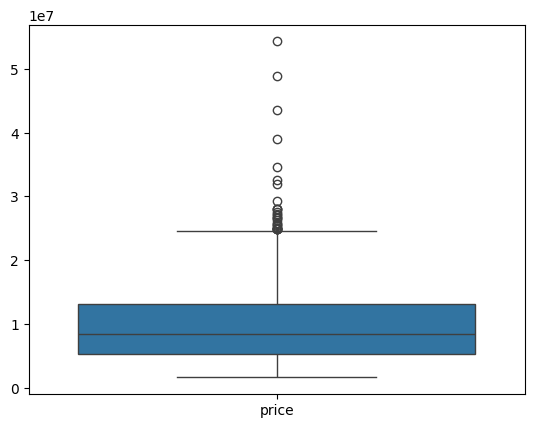

In [8]:
sns.boxplot(train_df);

In [9]:
train_df = train_df.drop(train_df[train_df["price"] >= 4*10**7].index)

In [10]:
train_df.duplicated().sum()

0

Model Name

In [11]:
train_df = train_df.drop(columns="model_name")
test_df = test_df.drop(columns="model_name")

Manufacturer

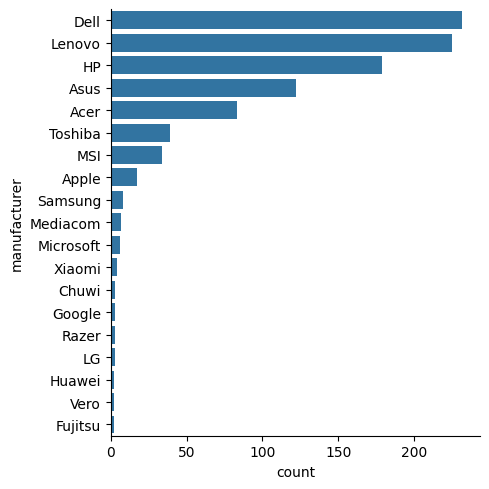

In [12]:
sns.catplot(train_df["manufacturer"], kind="count", order=train_df["manufacturer"].value_counts().index);

In [13]:
from sklearn.preprocessing import LabelEncoder

manufacturer_le = LabelEncoder()
manufacturer_le.fit(train_df["manufacturer"])

train_df["manufacturer"] = manufacturer_le.transform(train_df["manufacturer"])
test_df["manufacturer"] = manufacturer_le.transform(test_df["manufacturer"])

In [14]:
print(train_df["manufacturer"].head())
print(test_df["manufacturer"].head())
print(f"Class : {manufacturer_le.classes_}")

0    1
1    1
2    7
3    1
4    1
Name: manufacturer, dtype: int64
0     7
1     2
2     4
3    16
4    10
Name: manufacturer, dtype: int64
Class : ['Acer' 'Apple' 'Asus' 'Chuwi' 'Dell' 'Fujitsu' 'Google' 'HP' 'Huawei'
 'LG' 'Lenovo' 'MSI' 'Mediacom' 'Microsoft' 'Razer' 'Samsung' 'Toshiba'
 'Vero' 'Xiaomi']


Category

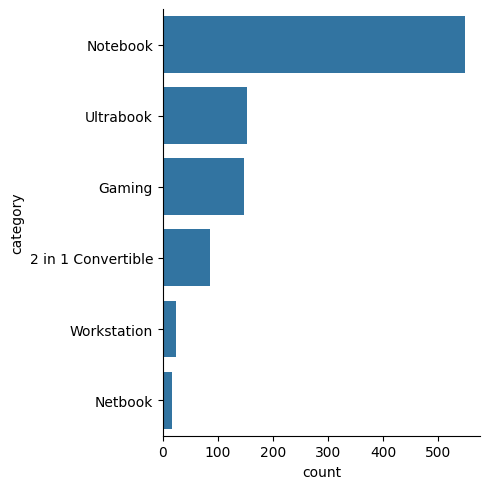

In [15]:
showCountPlot("category")

In [16]:
category_le = LabelEncoder()
category_le.fit(train_df["category"])

train_df["category"] = category_le.transform(train_df["category"])
test_df["category"] = category_le.transform(test_df["category"])

In [17]:
print(train_df["category"].head())
print(test_df["category"].head())
print(f"Class : {category_le.classes_}")

0    4
1    4
2    3
3    4
4    4
Name: category, dtype: int64
0    3
1    1
2    0
3    3
4    3
Name: category, dtype: int64
Class : ['2 in 1 Convertible' 'Gaming' 'Netbook' 'Notebook' 'Ultrabook'
 'Workstation']


Screen Size

<Figure size 1000x400 with 0 Axes>

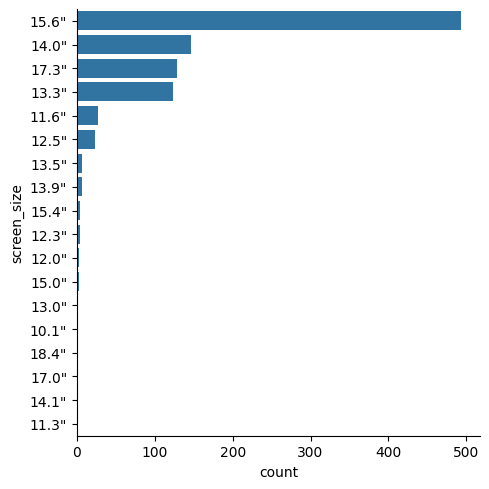

In [18]:
plt.figure(figsize=(10,4))
showCountPlot("screen_size")

In [19]:
train_df["screen_size"] = train_df["screen_size"].str.extract(r"(\d+\.+\d)").astype("float")
test_df["screen_size"] = test_df["screen_size"].str.extract(r"(\d+\.+\d)").astype("float")

In [20]:
print(train_df["screen_size"].head())
print(test_df["screen_size"].head())

0    13.3
1    13.3
2    15.6
3    15.4
4    13.3
Name: screen_size, dtype: float64
0    15.6
1    17.3
2    15.6
3    13.3
4    15.6
Name: screen_size, dtype: float64


Screen

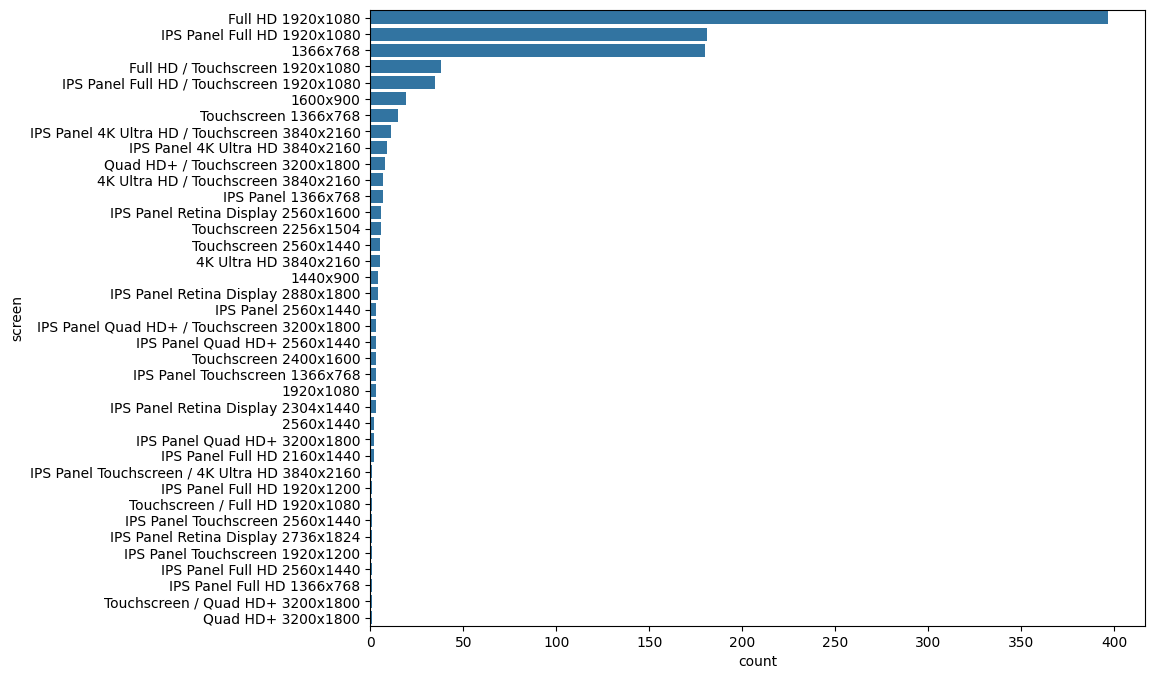

In [21]:
plt.figure(figsize=(10,8))
sns.countplot(train_df["screen"], order=train_df["screen"].value_counts().index);

In [22]:
train_df["width_screen"] = train_df["screen"].map(lambda x : x.split()[-1]).str.extract(r"(\d+)").astype("int")
test_df["width_screen"] = test_df["screen"].map(lambda x : x.split()[-1]).str.extract(r"(\d+)").astype("int")

train_df["height_screen"] = train_df["screen"].map(lambda x : x.split()[-1]).str.extract(r"(\d+$)").astype("int")
test_df["height_screen"] = test_df["screen"].map(lambda x : x.split()[-1]).str.extract(r"(\d+$)").astype("int")

In [23]:
train_df["screen"] = train_df["screen"].map(lambda x : " ".join(x.split()[:-1]))
test_df["screen"] = test_df["screen"].map(lambda x : " ".join(x.split()[:-1]))

<Figure size 1000x600 with 0 Axes>

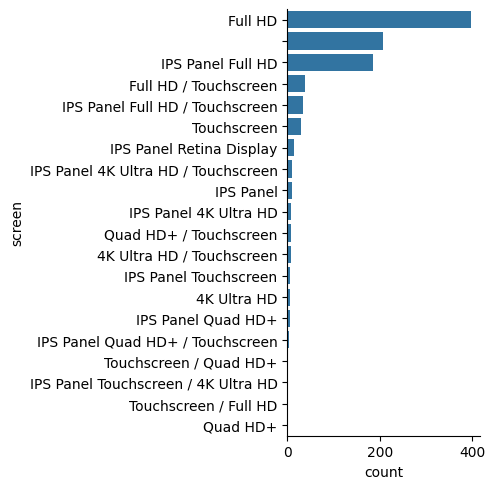

In [24]:
plt.figure(figsize=(10,6))
showCountPlot("screen")

In [25]:
train_df["touchscreen"] = train_df["screen"].str.match("Touchscreen").astype("int")
test_df["touchscreen"] = test_df["screen"].str.match("Touchscreen").astype("int")


In [26]:
train_df["screen"] = train_df["screen"].str.replace("Touchscreen", "").str.replace(" / ", "").str.strip()
test_df["screen"] = test_df["screen"].str.replace("Touchscreen", "").str.replace(" / ", "").str.strip()

<Figure size 1000x600 with 0 Axes>

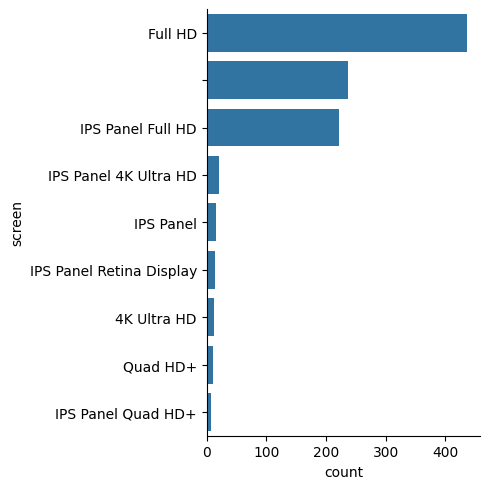

In [27]:
plt.figure(figsize=(10,6))
showCountPlot("screen")

In [28]:
screen_le = LabelEncoder()
screen_le.fit(train_df["screen"])
screen_le.classes_

array(['', '4K Ultra HD', 'Full HD', 'IPS Panel', 'IPS Panel 4K Ultra HD',
       'IPS Panel Full HD', 'IPS Panel Quad HD+',
       'IPS Panel Retina Display', 'Quad HD+'], dtype=object)

In [29]:
train_df["screen"] = screen_le.transform(train_df["screen"])
test_df["screen"] = screen_le.transform(test_df["screen"])

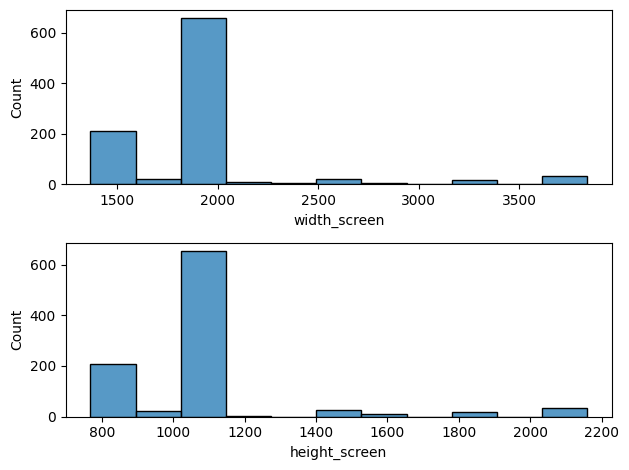

In [30]:
fig, ax = plt.subplots(2, 1)
sns.histplot(train_df["width_screen"], ax=ax[0])
sns.histplot(train_df["height_screen"], ax=ax[1])
plt.tight_layout()
plt.show()

CPU

In [31]:
train_df["brand_cpu"] = train_df["cpu"].map(lambda x : x.split()[0])
test_df["brand_cpu"] = test_df["cpu"].map(lambda x : x.split()[0])

<Axes: xlabel='count', ylabel='brand_cpu'>

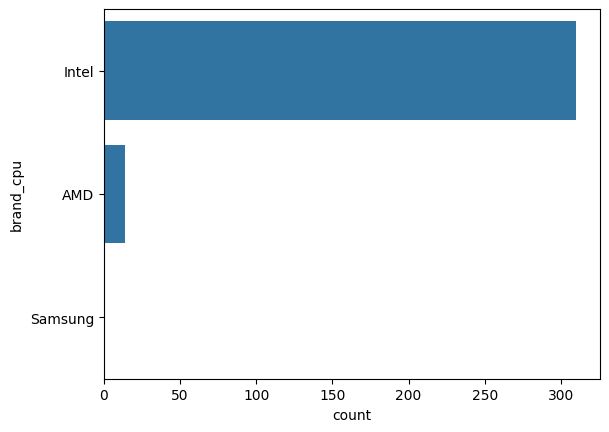

In [32]:
sns.countplot(test_df["brand_cpu"])

In [33]:
from sklearn.preprocessing import OneHotEncoder

brand_cpu_ohe = OneHotEncoder()
brand_cpu_ohe.fit(np.array(train_df["brand_cpu"]).reshape(-1,1))
brand_cpu_ohe.categories_

[array(['AMD', 'Intel'], dtype=object)]

In [34]:
test_df = test_df.drop(test_df[test_df["brand_cpu"] == "Samsung"].index)

In [35]:
trainBrand_cpuDf = pd.DataFrame(brand_cpu_ohe.transform(train_df["brand_cpu"].to_numpy().reshape(-1,1)).toarray(), columns=["amd", "intel"])
testBrand_cpuDf = pd.DataFrame(brand_cpu_ohe.transform(test_df["brand_cpu"].to_numpy().reshape(-1,1)).toarray(), columns=["amd", "intel"])

train_df["amd"] = trainBrand_cpuDf["amd"]
train_df["intel"] = trainBrand_cpuDf["intel"]

test_df["amd"] = testBrand_cpuDf["amd"]
test_df["intel"] = testBrand_cpuDf["intel"]

In [36]:
train_df = train_df.drop(columns="brand_cpu")
test_df = test_df.drop(columns="brand_cpu")

In [37]:
train_df["freq_cpu"] = train_df["cpu"].map(lambda x : x.split()[-1]).str.extract(r"(\d\.?\d)")
test_df["freq_cpu"] = test_df["cpu"].map(lambda x : x.split()[-1]).str.extract(r"(\d\.?\d)")

In [38]:
train_df["freq_cpu"] = train_df["freq_cpu"].replace(np.NaN, 0)
test_df["freq_cpu"] = test_df["freq_cpu"].replace(np.NaN, 0)

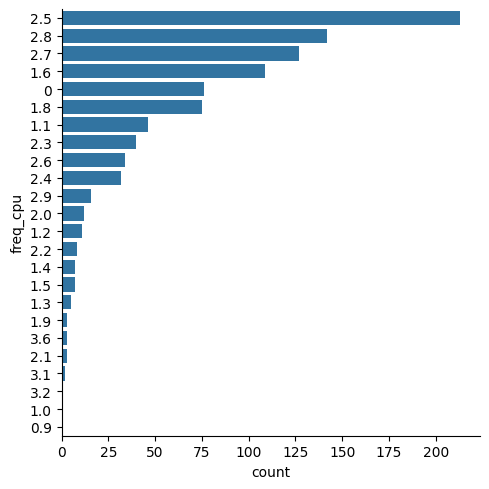

In [39]:
showCountPlot("freq_cpu")

In [40]:
train_df[train_df["freq_cpu"].isna()]

,manufacturer,category,screen_size,screen,cpu,ram,storage,gpu,operating_system,operating_system_version,weight,price,width_screen,height_screen,touchscreen,amd,intel,freq_cpu


In [41]:
train_df = train_df.drop(columns="cpu")
test_df = test_df.drop(columns="cpu")

RAM

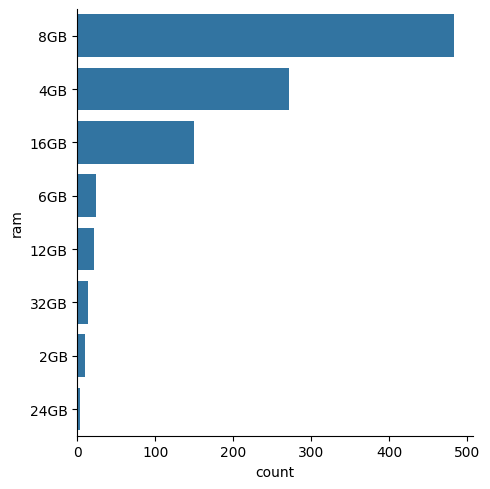

In [42]:
showCountPlot("ram")

In [43]:
train_df["ram"] = train_df["ram"].str.extract(r"(\d+)")
test_df["ram"] = test_df["ram"].str.extract(r"(\d+)")

In [44]:
train_df["ram"].value_counts()

ram
8     483
4     271
16    149
6      24
12     21
32     13
2      10
24      3
Name: count, dtype: int64

Storage

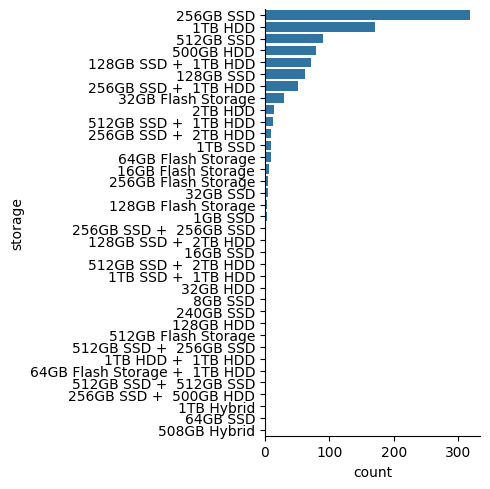

In [45]:
showCountPlot("storage")

In [46]:
import re

# Define a function to extract storage sizes
def extract_storage_size(storage_str, storage_type):
    pattern = re.compile(r'(\d+TB|\d+GB) ' + storage_type)
    matches = pattern.findall(storage_str)
    total_size = 0
    for match in matches:
        if 'TB' in match:
            total_size += float(match.replace('TB', '')) * 1024  
        else:
            total_size += float(match.replace('GB', ''))
    return total_size

train_df['ssd'] = train_df['storage'].apply(lambda x: extract_storage_size(x, 'SSD'))
train_df['hdd'] = train_df['storage'].apply(lambda x: extract_storage_size(x, 'HDD'))
train_df['hybrid'] = train_df['storage'].apply(lambda x: extract_storage_size(x, 'Hybrid'))
train_df['flash'] = train_df['storage'].apply(lambda x: extract_storage_size(x, 'Flash Storage'))

test_df['ssd'] = test_df['storage'].apply(lambda x: extract_storage_size(x, 'SSD'))
test_df['hdd'] = test_df['storage'].apply(lambda x: extract_storage_size(x, 'HDD'))
test_df['hybrid'] = test_df['storage'].apply(lambda x: extract_storage_size(x, 'Hybrid'))
test_df['flash'] = test_df['storage'].apply(lambda x: extract_storage_size(x, 'Flash Storage'))

In [47]:
train_df = train_df.drop(columns="storage")
test_df = test_df.drop(columns="storage")

In [48]:
# train_df["extra_storage"] = train_df["storage"].map(lambda x : x.split("+")[-1])
# test_df["extra_storage"] = test_df["storage"].map(lambda x : x.split("+")[-1])

In [49]:
# train_df["storage"] = train_df["storage"].map(lambda x : x.split("+")[0])
# test_df["storage"] = test_df["storage"].map(lambda x : x.split("+")[0])

GPU

In [50]:
print(train_df["gpu"].value_counts().to_string())

gpu
Intel HD Graphics 620             225
Intel HD Graphics 520              98
Intel UHD Graphics 620             66
Nvidia GeForce GTX 1050            57
AMD Radeon 530                     37
Nvidia GeForce 940MX               35
Intel HD Graphics 500              34
Nvidia GeForce GTX 1060            34
Nvidia GeForce GTX 1070            26
Intel HD Graphics 400              24
Nvidia GeForce GTX 1050 Ti         22
Nvidia GeForce 930MX               17
AMD Radeon R5 M430                 17
Nvidia GeForce MX150               15
AMD Radeon 520                     15
Intel HD Graphics                  13
Intel HD Graphics 615              12
Nvidia GeForce 920MX               11
Intel HD Graphics 505              11
Nvidia Quadro M1200                 9
AMD Radeon R7 M445                  9
AMD Radeon R5 M420                  8
AMD Radeon R5                       8
Intel Iris Plus Graphics 640        7
Intel HD Graphics 405               7
Nvidia GeForce MX130                6
Intel HD

In [51]:
train_df["brand_gpu"] = train_df["gpu"].map(lambda x : x.split()[0])
test_df["brand_gpu"] = test_df["gpu"].map(lambda x : x.split()[0])

In [52]:
brandGpu_le = LabelEncoder()
brandGpu_le.fit(train_df["brand_gpu"])
brandGpu_le.classes_

array(['AMD', 'Intel', 'Nvidia'], dtype=object)

In [53]:
train_df["brand_gpu"] = brandGpu_le.transform(train_df["brand_gpu"])
test_df["brand_gpu"] = brandGpu_le.transform(test_df["brand_gpu"])

In [54]:
train_df = train_df.drop(columns="gpu")
test_df = test_df.drop(columns="gpu")

Operating System

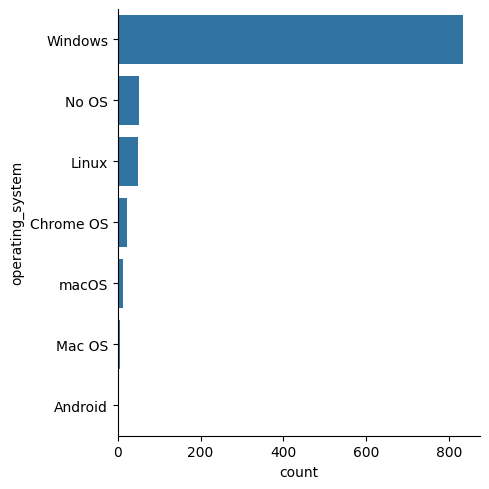

In [55]:
showCountPlot("operating_system")

In [56]:
train_df["operating_system"] = train_df["operating_system"].replace("Mac OS", "macOS")
test_df["operating_system"] = test_df["operating_system"].replace("Mac OS", "macOS")

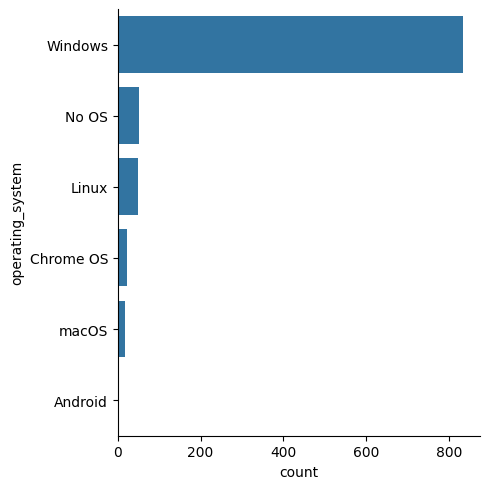

In [57]:
showCountPlot("operating_system")

In [58]:
os_le = LabelEncoder()
os_le.fit(train_df["operating_system"])
os_le.classes_

array(['Android', 'Chrome OS', 'Linux', 'No OS', 'Windows', 'macOS'],
      dtype=object)

In [59]:
train_df["operating_system"] = os_le.transform(train_df["operating_system"])
test_df["operating_system"] = os_le.transform(test_df["operating_system"])

In [60]:
train_df.head()

,manufacturer,category,screen_size,screen,ram,operating_system,operating_system_version,weight,price,width_screen,height_screen,touchscreen,amd,intel,freq_cpu,ssd,hdd,hybrid,flash,brand_gpu
0,1,4,13.3,7,8,5,NaN,1.37kg,11912523.48,2560,1600,0,0.0,1.0,2.3,128.0,0.0,0.0,0.0,1
1,1,4,13.3,0,8,5,NaN,1.34kg,7993374.48,1440,900,0,0.0,1.0,1.8,0.0,0.0,0.0,128.0,1
2,7,3,15.6,2,8,3,NaN,1.86kg,5112900.00,1920,1080,0,0.0,1.0,2.5,256.0,0.0,0.0,0.0,1
3,1,4,15.4,7,16,5,NaN,1.83kg,22563005.40,2880,1800,0,0.0,1.0,2.7,512.0,0.0,0.0,0.0,0
4,1,4,13.3,7,8,5,NaN,1.37kg,16037611.20,2560,1600,0,0.0,1.0,3.1,256.0,0.0,0.0,0.0,1


Operating System Version

In [61]:
train_df = train_df.drop(columns="operating_system_version")
test_df = test_df.drop(columns="operating_system_version")

Weight

In [62]:
train_df["weight"] = train_df["weight"].str.extract(r"(\d+\.?\d+)").astype("float")
test_df["weight"] = test_df["weight"].str.extract(r"(\d+\.?\d+)").astype("float")

In [63]:
train_df["weight"] = train_df["weight"].replace(np.NaN, 0)
test_df["weight"] = test_df["weight"].replace(np.NaN, 0)

<Axes: xlabel='weight', ylabel='Count'>

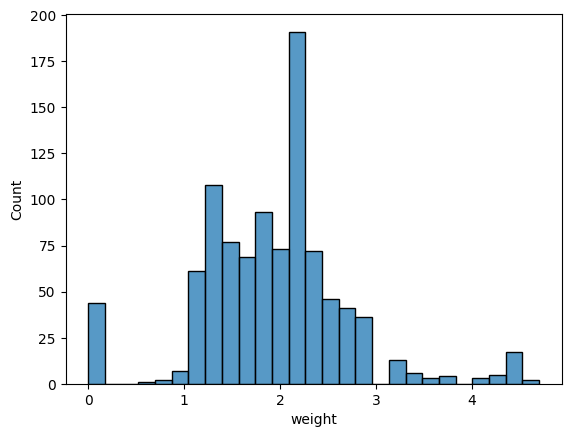

In [64]:
sns.histplot(train_df["weight"])

Correlation Analysis

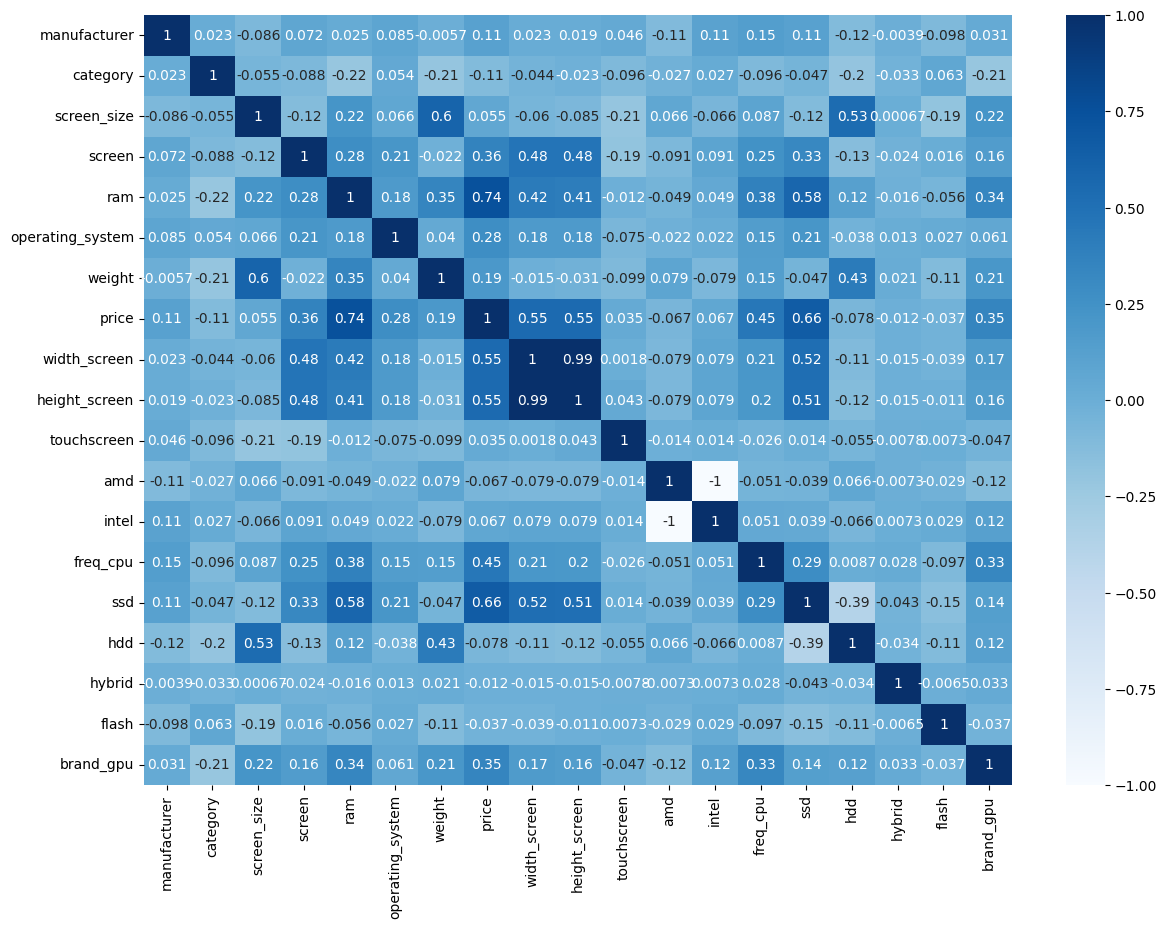

In [65]:
plt.figure(figsize=(14,10))
sns.heatmap(train_df.corr(), annot=True, cmap="Blues")
plt.show()

In [66]:
test_df.isna().sum()

manufacturer        0
category            0
screen_size         0
screen              0
ram                 0
operating_system    0
weight              0
price               0
width_screen        0
height_screen       0
touchscreen         0
amd                 1
intel               1
freq_cpu            0
ssd                 0
hdd                 0
hybrid              0
flash               0
brand_gpu           0
dtype: int64

In [67]:
train_df = train_df.dropna()
test_df = test_df.dropna()

Save to CSV

In [68]:
train_df.to_csv("./Result/clean_laptops_train.csv", index=False)
test_df.to_csv("./Result/clean_laptops_test.csv", index=False)

Apply Machine Learning

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, confusion_matrix

train_Cleandf = pd.read_csv("./Result/clean_laptops_train.csv")
X_train = train_Cleandf.drop(columns="price")
y_train = train_Cleandf["price"]

test_Cleandf = pd.read_csv("./Result/clean_laptops_test.csv")
X_test = test_Cleandf.drop(columns="price")
y_test = test_Cleandf["price"]

best_model = {}

In [70]:
def applyModel(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return r2_score(y_test, y_pred)

Linear Regression Model

In [71]:
linearReg = LinearRegression()
best_model["linearReg"] = applyModel(linearReg)

Support Vector Regression

In [72]:
svr = SVR()
best_model["svr"] = applyModel(svr)

Random Forest Regression

In [73]:
randomForest = [applyModel(RandomForestRegressor(n)) for n in range(100, 1000, 50)]
best_model[f"randomForest ({100 + (np.argmax(randomForest) * 50)})"] = np.max(randomForest)

In [74]:
Knear = [applyModel(KNeighborsRegressor(n)) for n in range(1, 20)]
best_model[f"kNear ({np.argmax(Knear)})"] = np.max(Knear)

In [75]:
best_model

{'linearReg': 0.6257448503692906,
 'svr': -0.05823740384187137,
 'randomForest (1)': 0.7590185337330797,
 'kNear (6)': 0.6192256224417266}